# Welcome  

Notebook Author: Samuel Alter  
Notebook Subject: Capstone Project - Satellite Imagery

BrainStation Winter 2023: Data Science

In [1]:
# tutorial from:
# https://pygis.io/docs/d_understand_crs_codes.html

In [2]:
# Import module
import geopandas as gpd

# Read data (shapefile)
dc = gpd.read_file("https://opendata.arcgis.com/\
datasets/7241f6d500b44288ad983f0942b39663_10.geojson")

In [3]:
type(dc)

geopandas.geodataframe.GeoDataFrame

In [5]:
# Import module
import matplotlib.pyplot as plt

def map_data(data, header):
    '''
    Function superimposes all the data on a map
    and sets a title for the map.
    '''    
    
    # Create subplots
    fig, ax = plt.subplots(figsize = (10, 5))
    
    # Set colors
    colors = ["#a3ddcb", "#03506f"]
    
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = colors[i], ax = ax)
    
    # Add title
    plt.title(header)
    
    # Utilize BMH plotting style
    plt.style.use("bmh")
    
    # Remove empty white space around the plot
    plt.tight_layout()

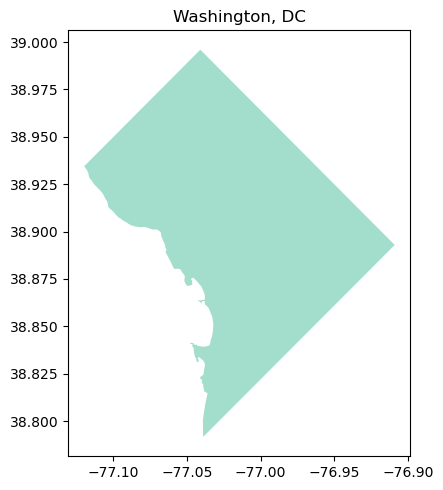

In [6]:
# Create map using DC shapefile
map_data([dc], "Washington, DC")

In [7]:
# Get CRS for DC shapefile
print("CRS: {}".format(dc.crs))

CRS: epsg:4326


In [8]:
# Example 1: Create a copy of the DC shapefile
dc_reproject_proj4 = dc.copy()

# Example 1: Reproject the data to NAD83 using PROJ.4 string
# Source: https://spatialreference.org/ref/epsg/nad83/
dc_reproject_proj4 = dc_reproject_proj4.to_crs("+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs")


# Example 2: Create a copy of the DC shapefile
dc_reproject_epsg = dc.copy()

# Example 2: Reproject the data to NAD83 using EPSG code
dc_reproject_epsg = dc_reproject_epsg.to_crs(epsg=4269)

When we call the .crs attribute, it’s no longer 'epsg:4326', which means that the data has been reprojected!

In [9]:
# Example 1: Print new CRS of DC
print("Example 1 (PROJ.4 string) CRS: {}".format(dc_reproject_proj4.crs))

# Example 2: Print new CRS of DC
print("Example 2 (EPSG code) CRS: {}".format(dc_reproject_epsg.crs))

Example 1 (PROJ.4 string) CRS: +proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs +type=crs
Example 2 (EPSG code) CRS: epsg:4269


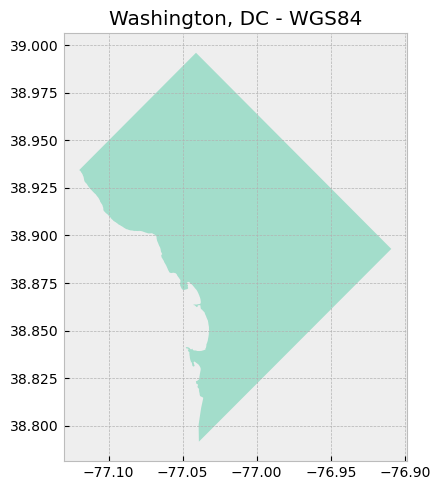

In [10]:
# Map original DC shapefile
map_data([dc], "Washington, DC - WGS84")

In [11]:
# Check geometry values of original shapefile
print("Geometry of shapefile:\n{}".format(dc['geometry'].head()))

Geometry of shapefile:
0    POLYGON ((-77.11980 38.93435, -77.11979 38.934...
Name: geometry, dtype: geometry
